In [4]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

a) Sett opp en ligning som beskriver Helle sin budsjetbetingelse.

Der C = m + w * h og h = T-L

Vi vet at m = 100 og w = 2.5


T er antall arbeidstimer og helle kan ha totalt ha 7*12 = 84, dvs T = 84.

Nyttefunksjonen er gitt ved $ U = C^a*L^b $


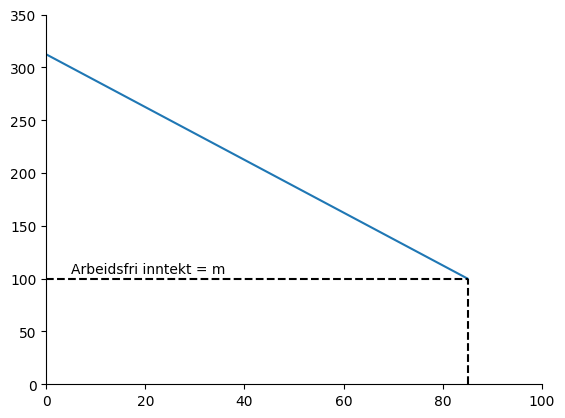

In [209]:
# definerer symboler jeg kan få bruk for. 
m,M,P,W,T = sp.symbols("m M P W T")

L_0 = np.linspace(0.001,85,1000)

def budsjett(L): 
    return 100+2.5*(85-L)

def create_ax():
    fig, ax = plt.subplots()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_ylim(0,350)
    ax.set_xlim(0,100)
    return fig, ax

fig, ax = create_ax()
ax.plot(L_0,budsjett(L_0))

ax.vlines(85,0,100, color='black',ls='dashed')
ax.hlines(100,0,85, color='black',ls='dashed')
ax.annotate('Arbeidsfri inntekt = m', (0+5,100+5));

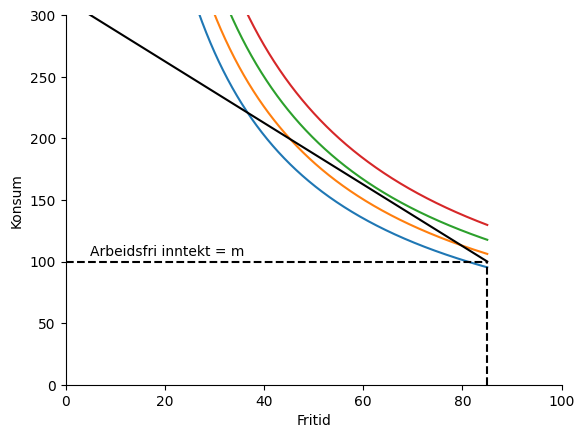

In [226]:
# tegne indifferenskurver for a= .5, b= .5

C,L,a,b,u,u_0 = sp.symbols("C L a b u u_0", real=True, positive=True)

u = C**a*L**b

def create_ax():
                fig, ax = plt.subplots()
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,300))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlabel('Fritid')
                ax.set_ylabel('Konsum')
                
                return fig, ax

fig, ax = create_ax()


# Løser med hensyn på L 
L_ind_sol=sp.solve(u-u_0,L)[0]
L_ind_sol

# Må gjøre om for å plotte 
indiff_L=sp.lambdify((u_0,a,b,C), L_ind_sol)
indiff_L(u_0,a,b,C)

for i in range (90, 110,5):
    ax.plot(L_0, indiff_L(i,0.5,0.5,L_0))
    
ax.plot(L_0,budsjett(L_0), color = 'black')

ax.vlines(85,0,100, color='black',ls='dashed')
ax.hlines(100,0,85, color='black',ls='dashed')
ax.annotate('Arbeidsfri inntekt = m', (0+5,100+5));


Reservasjonslønna er den laveste lønna individet er villig til å godta. Den laveste lønna vil gjøre individet indifferent mellom det å jobbe og det å ha 100% fri. En annen måte å si dette på er at det optimale valget L*=T. Vilkåret for L*=T er at lønna er lik helningen på indifferenskurven der C = M og L=T

In [207]:
budsjettbetingelse = 100 + 2.5*(85-L)
der_budsjett = sp.diff(budsjettbetingelse,L)
print(f'Helningen på budsjettbetingelsen er:') 
der_budsjett

Helningen på budsjettbetingelsen er:


-2.50000000000000

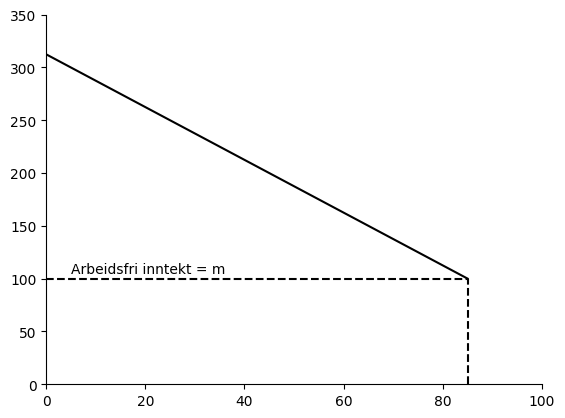

In [223]:
fig, ax = create_ax()
ax.plot(L_0,budsjett(L_0), color = 'black')
ax.vlines(85,0,100, color='black',ls='dashed')
ax.hlines(100,0,85, color='black',ls='dashed')
ax.annotate('Arbeidsfri inntekt = m', (0+5,100+5))

C = 100 
L = 85